In [1]:
# Basics 
import numpy as np
import sys
import pickle
import os

# plotting 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 
from IPython.display import Image,display
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

In [2]:
sys.path.append('../cvar_single_choice/')
from CVaR_Calculation import calc_cvar, find_CVaR_SLSQP

In [3]:
def myround(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)

### Distributions

In [10]:
y_set = y_set_for_plotting = [0,0.05,0.1,0.3,0.6,1]

In [11]:
zis = np.array([-4,-3,-2,-1,
       0,
       1,2,3])
pis = np.array([0.05,0.05,0.1,0.15,
       0.3,
       0.2,0.10,0.05])
np.sum(pis)

1.0

In [20]:
1.0
zis_full = []
for pi,zi in zip(pis,zis):
    ni = pi*100
    zis_full.extend(list(np.repeat(zi,int(ni)).flatten()))
zis_full=np.array(zis_full)

# data distribution
zis_full

array([-4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3])

In [22]:
# calculating cvar 

alpha=0.3
var,cvar,cvar_leq = calc_cvar(zis_full,alpha)
cvar_dist,xis = find_CVaR_SLSQP(alpha,pis,-1*zis)
print(cvar_leq)
print(cvar_leq)
print(-1*cvar_dist)
print(np.round(xis,3))

lower_xi=1/np.max(xis)
log_xis = np.log(xis+lower_xi)
print(np.round(log_xis,3))

print(var)

-2.0
-2.0
-2.1666666653672397
[3.333 3.333 3.333 2.222 0.    0.    0.    0.   ]
[ 1.29   1.29   1.29   0.925 -1.204 -1.204 -1.204 -1.204]
-1.0


### Panel (a)

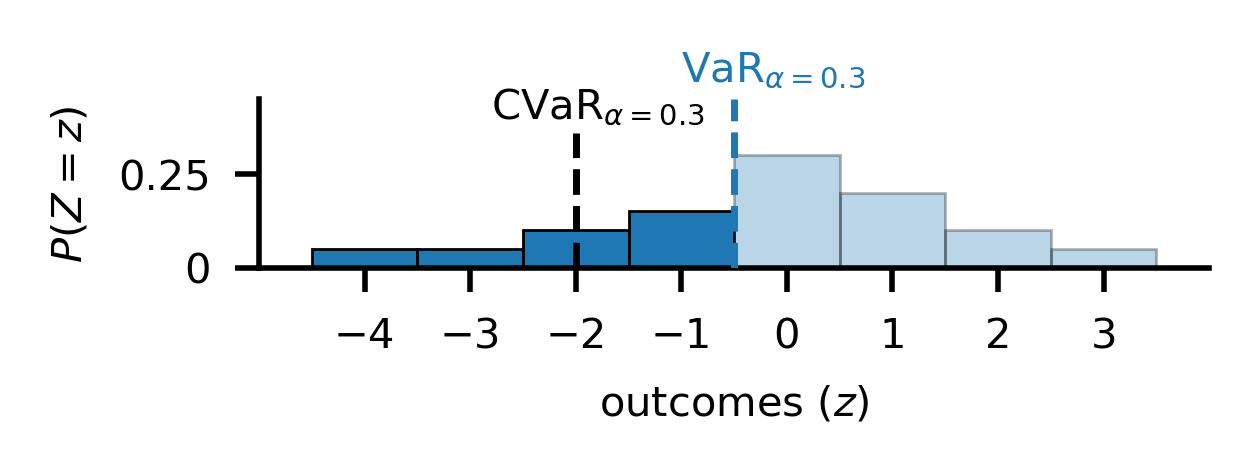

In [23]:
yi = 3

fheight = 0.75 #2/(L+1)
fig = plt.figure(figsize=(2,fheight),dpi=500)
fontsize = 6

rect=[0.025,0.44,0.95,0.45]
ax = plt.axes(rect)

var,cvar,cvar_leq = calc_cvar(zis_full,y_set[yi])
var = myround(var,prec=1,base=1)

bins = np.arange(-5.5,4.5,1)
plt.hist(zis_full[zis_full<=var],bins=bins,
         density=False,color=sns.color_palette()[0],alpha=1,edgecolor='k',linewidth=0.4);
if yi!=20:
    plt.hist(zis_full[zis_full>var],bins=bins,
         density=False,color=sns.color_palette()[0],alpha=0.3,edgecolor='k',linewidth=0.4);

# CVaR Line #
plt.axvline(x=cvar_leq,
            ymax=0.8,
            color='k',linestyle='--',linewidth=1,zorder=3)
plt.text(cvar_leq-0.8,
         40,r'CVaR$_{\alpha=0.3}$',fontsize=fontsize)

# VaR Line #
plt.axvline(x=var+0.5,
            ymax=1,color=sns.color_palette()[0],linestyle='--',linewidth=1,zorder=3)
plt.text(var,
         50,r'VaR$_{\alpha=0.3}$',fontsize=6,color=sns.color_palette()[0])


plt.xticks(zis,fontsize=fontsize)
plt.xlabel(r'outcomes $(z)$',fontsize=fontsize)
plt.xlim([-5,4])
plt.ylim([0,45])
plt.ylabel(r'$P(Z=z)$',fontsize=fontsize)
plt.yticks([0,25],[0,0.25],fontsize=fontsize)
ax = plt.gca()
sns.despine(left=False)

#plt.savefig('../figs/paper_figs/fig1_histogram.png',dpi=500)

### Panel (b)

3
0
-1
-2
-3


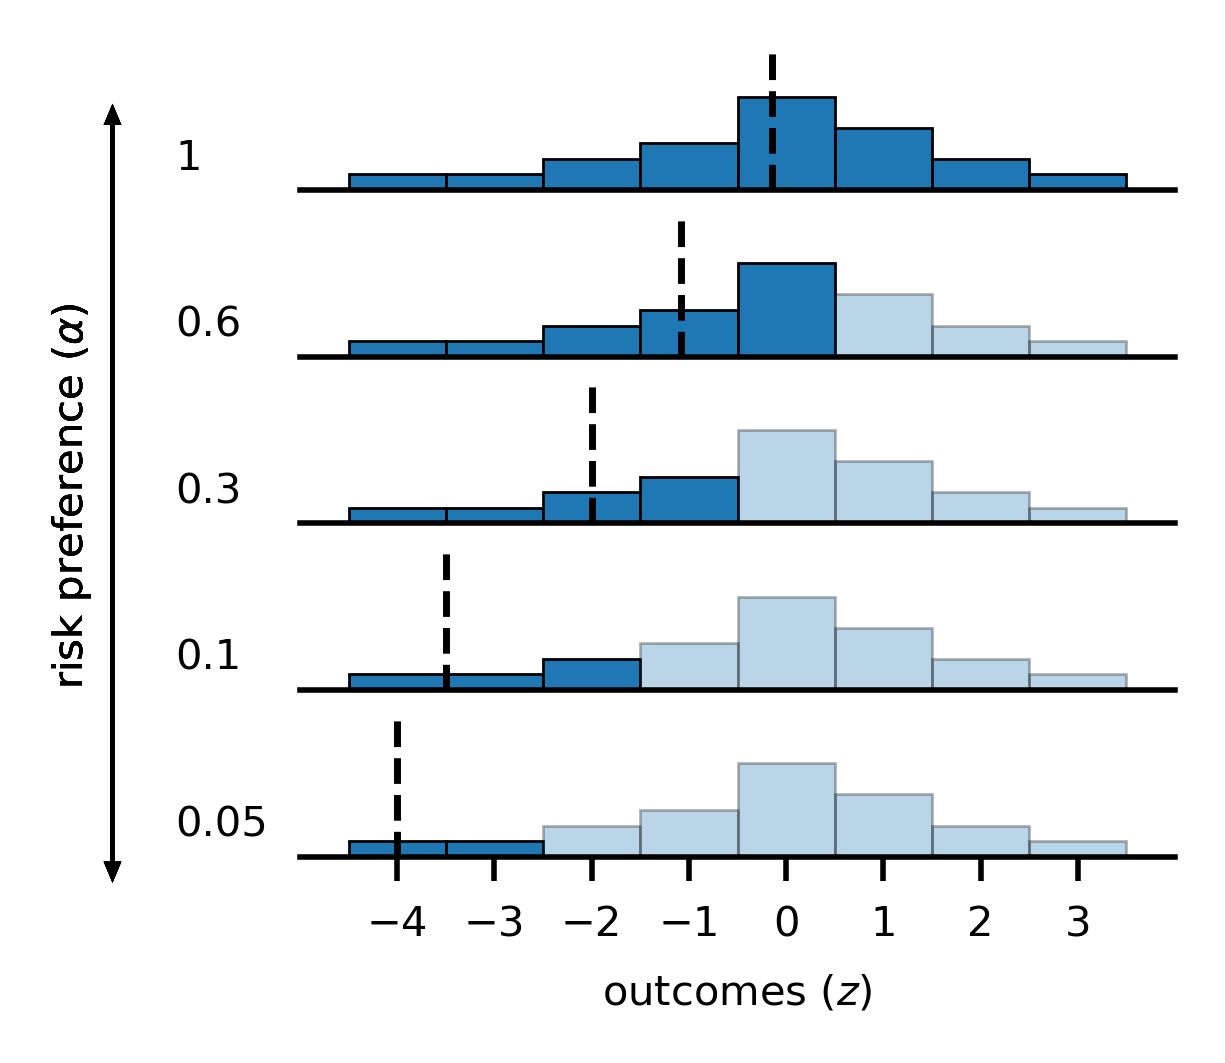

In [25]:
fig = plt.figure(figsize=(2.5,2),dpi=500)#facecolor='blue')

fontsize = 6

yis = [5,4,3,2,1]
axes = []
L = len(yis)

for i in range(len(yis)):
    x0 = 0.25 # start slightly in 
    y0 = (L-i)*(1/(L+1))#*0.75 # reverse, then 1/number of items +1 for legend 
    height = (1/L)*0.7
    width = 0.7
    rect = [x0, y0,width,height]
    #print(rect)
    axes.append(plt.axes(rect))
    

for i,yi in enumerate(yis):
    
    plt.sca(axes[i])
    var,cvar,cvar_leq = calc_cvar(zis_full,y_set[yi])
    var = myround(var,prec=1,base=1)
    print(var)
    
    bins = np.arange(-5.5,4.5,1)

    plt.hist(zis_full[zis_full<=var],bins=bins,
             density=False,color=sns.color_palette()[0],alpha=1,edgecolor='k',linewidth=0.4);
    if yi!=20:
        plt.hist(zis_full[zis_full>var],bins=bins,
             density=False,color=sns.color_palette()[0],alpha=0.3,edgecolor='k',linewidth=0.4);
    
    plt.axvline(x=cvar_leq,color='k',linestyle='--',linewidth=1,zorder=3)
    #plt.axvline(x=var,color=sns.color_palette()[0],linestyle='--',linewidth=0.5,zorder=3)
    
    

    plt.text(0.15,0.02+(L-i)*(1/(L+1)),r''+str(np.round(y_set_for_plotting[yi],2)),
             transform=plt.gcf().transFigure,clip_on=False,fontsize=fontsize) 

    # X-axis 
    sns.despine(left=True)
    plt.yticks([])
    if i!=len(yis)-1:
        plt.xticks([])
    elif i==len(yis)-1:
        plt.xticks(zis,fontsize=fontsize)
        plt.xlabel(r'outcomes $(z)$',fontsize=fontsize)
    plt.xlim([-5,4])

    # arrow 
    x0=0.1; y0=1/L*0.8
    x1=0.1; y1=0.9#*(L-1)/L
    plt.arrow(x1,y1,x0-x1,y0-y1,transform=plt.gcf().transFigure,
             color='k',clip_on=False,head_width=.01,linewidth=.5)
    plt.arrow(x0,y0,x1-x0,y1-y0,transform=plt.gcf().transFigure,
             color='k',clip_on=False,head_width=.01,linewidth=.5)
    
    plt.text(x0-0.05,y0+0.25*(y1-y0),r'risk preference ($\alpha$)',
                 transform=plt.gcf().transFigure,clip_on=False,
                 rotation=90,fontsize=fontsize)
    
    # ylim 
    plt.ylim([0,45])
    

### Panel (c)

In [26]:
basic_cols=[(0.0, 0.0, 1.0, 1.0),(0, 0.0, 0.0, 0.8),(1.0, 0.0, 0.0, 1.0)]
basic_cols=[(0.0, 0.0, 0.8, 1.0), (0.3, 0.3, 0.3, 1),(0.8, 0.0, 0.8, 1.0)]
n_colors=100
cmap_bkr=LinearSegmentedColormap.from_list('bkr', basic_cols,n_colors)


maxabs_logxis = np.max(np.abs(log_xis))
min_logxis = np.min(log_xis)
max_logxis = np.max(log_xis)
log_xis_for_plotting = np.array(n_colors/2 + n_colors/2.1*((log_xis) / maxabs_logxis)).astype('int')
print(log_xis_for_plotting)

[97 97 97 84  5  5  5  5]


Text(-0.25, 0.2, '$\\alpha=1$')

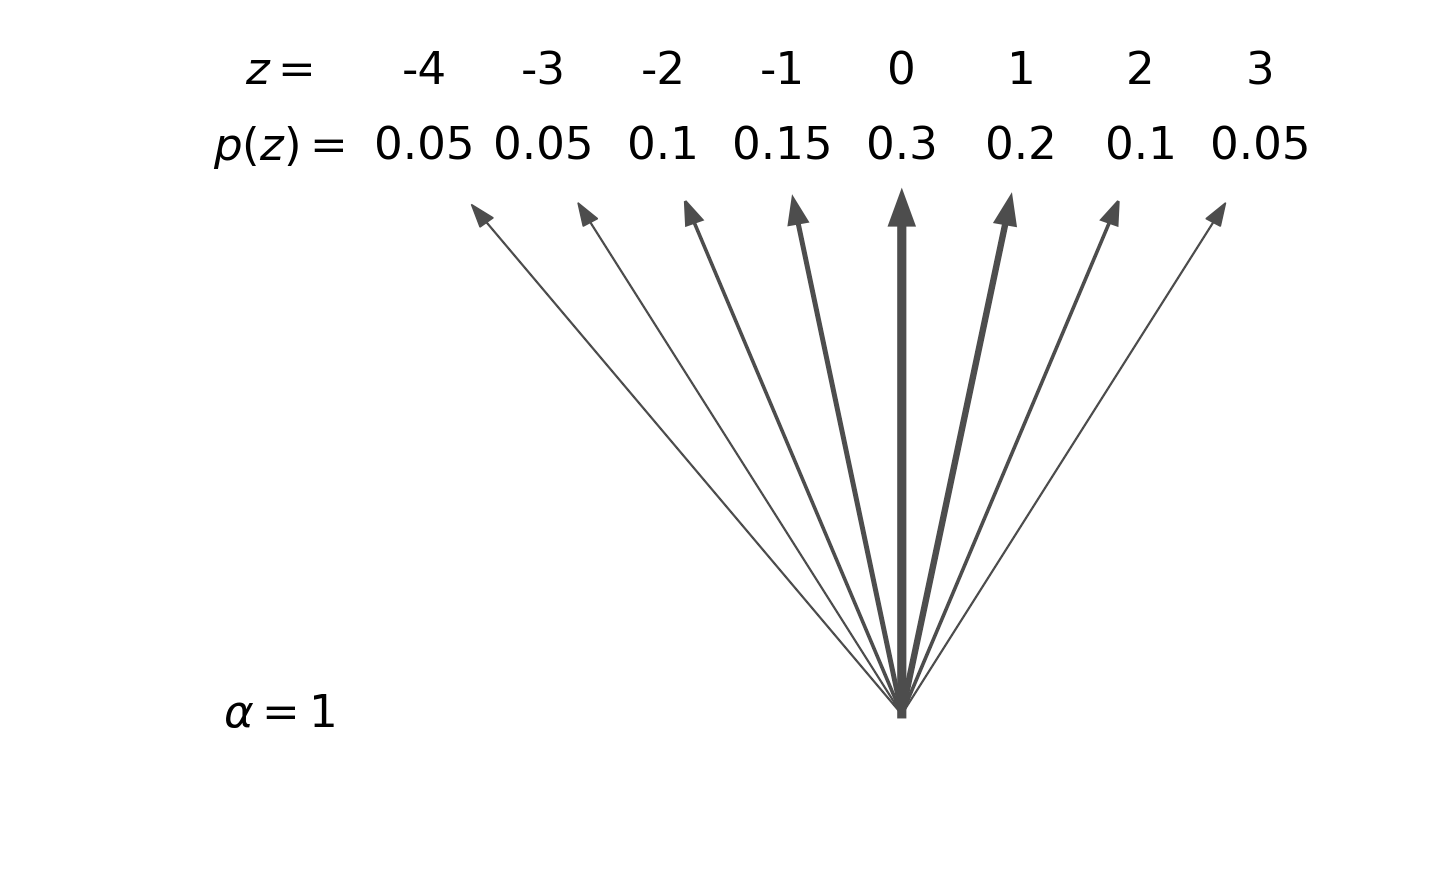

In [27]:
fig = plt.figure(figsize=(3,1.5),dpi=500)
ax = plt.gca()

fontsize = 6.5

arr_img = mpimg.imread('../mscl/man_blue.png')
imagebox = OffsetImage(arr_img , zoom=.06)
ab = AnnotationBbox(imagebox, (0.5, 0.1),pad=0)
ax.add_artist(ab)

for i,(zi,pi,xi,logxi_colori) in enumerate(zip(zis,pis,xis,log_xis_for_plotting)):

    x=0.5
    y=0.2
    dx=i/(len(zis))-0.5
    dy=0.65
    dy_extra1 = 0.1
    dy_extra2 = 0.2
    dx_extra1 = dx*0.15
    dx_extra2 = dx*0.15
    
    xi = np.round(xi,1)
    xipi = np.round(pi*xi,2)
    pi = np.round(pi,2)
    
    plt.arrow(x,y,dx,dy,linewidth=pi*4,head_width=.02,color=(0.3,0.3,0.3,1))
    plt.text(x+dx+dx_extra1,y+dy+dy_extra2,str(zi),fontsize=fontsize,va='center',ha='center')
    plt.text(x+dx+dx_extra2,y+dy+dy_extra1,str(pi),fontsize=fontsize,zorder=3,va='center',ha='center')

plt.text(-0.25,y+dy+dy_extra2,r'$z=$',fontsize=fontsize,zorder=3,va='center',ha='center')
plt.text(-0.25,y+dy+dy_extra1,r'$p(z)=$',fontsize=fontsize,zorder=3,va='center',ha='center')
plt.axis('off')
plt.xlim([-0.3,1.1])
plt.text(-0.25,0.2,r'$\alpha=1$',fontsize=fontsize,zorder=3,va='center',ha='center')

### Panel (d)

Text(-0.25, 0.2, '$\\alpha=0.3$')

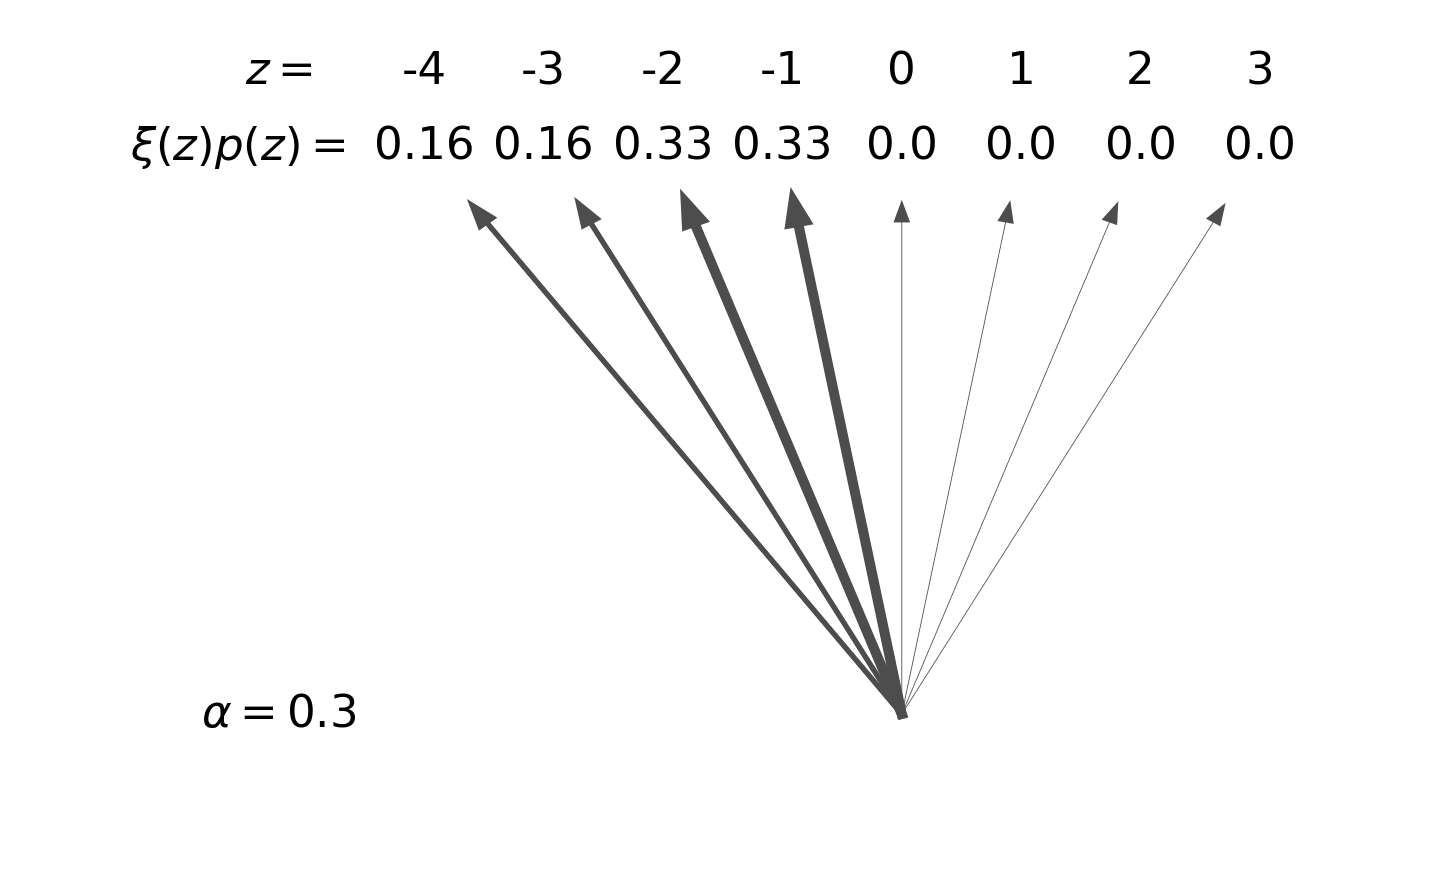

In [28]:
fig = plt.figure(figsize=(3,1.5),dpi=500)
ax = plt.gca()

fontsize = 6.5

arr_img = mpimg.imread('../mscl/man_blue.png')
imagebox = OffsetImage(arr_img , zoom=.06)
ab = AnnotationBbox(imagebox, (0.5, 0.1),pad=0)
ax.add_artist(ab)

for i,(zi,pi,xi,logxi_colori) in enumerate(zip(zis,pis,xis,log_xis_for_plotting)):

    x=0.5
    y=0.2
    dx=i/(len(zis))-0.5
    dy=0.65
    dy_extra1 = 0.10
    dy_extra2 = 0.2
    dx_extra = dx*0.15
    
    xi = np.round(xi,1)
    xipi = np.round(pi*xi,2)
    
    plt.arrow(x,y,dx,dy,linewidth=xi*pi*4,head_width=.02,color=(0.3,0.3,0.3,1))
    plt.text(x+dx+dx_extra,y+dy+dy_extra2,str(zi),fontsize=fontsize,va='center',ha='center')
    plt.text(x+dx+dx_extra,y+dy+dy_extra1,str(xipi),fontsize=fontsize,zorder=3,va='center',ha='center')

plt.text(-0.25,y+dy+dy_extra2,r'$z=$',fontsize=fontsize,zorder=3,va='center',ha='center')
plt.text(-0.3,y+dy+dy_extra1,r'$\xi(z)p(z)=$',fontsize=fontsize,zorder=3,va='center',ha='center')
plt.axis('off')
plt.xlim([-0.3,1.1])
plt.text(-0.25,0.2,r'$\alpha=0.3$',fontsize=fontsize,zorder=3,va='center',ha='center')